In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [48]:
# Load cifar10 dataset in the environment
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape) #print the shape of the dataset

(50000, 32, 32, 3)


In [49]:
accur = [] # defining accuracy array

for k in range(1, 201): #lopping for k=200 times
  print("k: ", k)
  accuracy = []
  for f in range(5): 
    # five folds defining
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    # c = correct, m = manhattan, e = euclidean
    cm = ce = 0         

    for i in range(len(validationX)): #declaring the range for validation
      man_distance = []
      euc_distance = []

    #declaring the range for trainX
      for j in range(len(trainX)):
        # calculating l1 distance
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        # calculating l2 distance
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
      # for manhattan distance
      values = man_distance[:k, 1]
      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      # print(most_frequent_value)
      if most_frequent_value == validationY[i]:
        cm += 1
         # for euclidean distance
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1

      # print(man_distance[0][0], man_distance[-1][0])
      # print(euc_distance[0], euc_distance[-1])

      if i == 200:
        break

    accuracy.append([cm/100, ce/100])
  accur.append([accuracy, k])

print(accur)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49
k:  50
k:  51
k:  52
k:  53
k:  54
k:  55
k:  56
k:  57
k:  58
k:  59
k:  60
k:  61
k:  62
k:  63
k:  64
k:  65
k:  66
k:  67
k:  68
k:  69
k:  70
k:  71
k:  72
k:  73
k:  74
k:  75
k:  76
k:  77
k:  78
k:  79
k:  80
k:  81
k:  82
k:  83
k:  84
k:  85
k:  86
k:  87
k:  88
k:  89
k:  90
k:  91
k:  92
k:  93
k:  94
k:  95
k:  96
k:  97
k:  98
k:  99
k:  100
k:  101
k:  102
k:  103
k:  104
k:  105
k:  106
k:  107
k:  108
k:  109
k:  110
k:  111
k:  112
k:  113
k:  114
k:  115
k:  116
k:  117
k:  118
k:  119
k:  120
k:  121
k:  122
k:  123
k:  124
k:  125
k:  126
k:  127
k:  128
k:  129
k:  130
k:  131
k:  132
k:  133
k:  134
k:  135
k:  136
k:  137
k:  138
k:  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


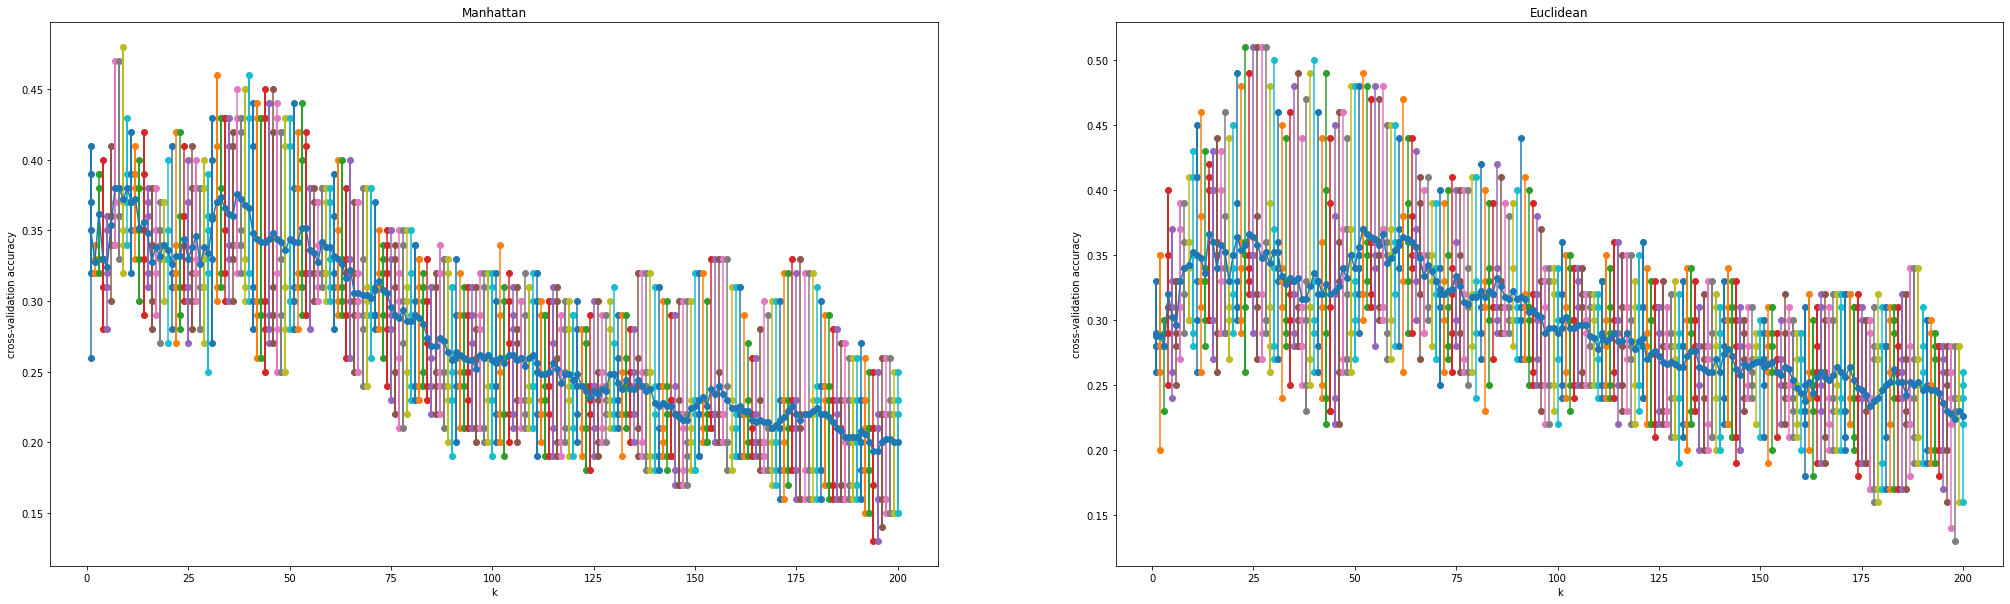

In [50]:
a1 = []
a2 = []
k = np.array(accur)[:,1]

plt.figure(figsize=(35,10)) #defining the figure size
plt.subplot(1,2,1) #defining subplot
plt.title('Manhattan') #printing the title
for i in range(len(accur)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accur[i][0])[:,0] #defining manhattan accuracy
  a1.append(np.average(l1))
  plt.plot(a, l1, 'o-') #ploting the graph
  
plt.plot(k, a1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2) #defining subplot
plt.title('Euclidean') #printing the title
for i in range(len(accur)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accur[i][0])[:,1] #defining euclidean accuracy
  a2.append(np.average(l2))
  plt.plot(a, l2, 'o-') #ploting the graph

plt.plot(k, a2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')
# visualizing the cross validation accuracy between l1 and l1 distances for k values
plt.show() 